# Analysis of SBI Data from ECI: Political Parties
## Introduction 
On March 14, the ECI mandated that the State Bank of India release a complete list of electoral bonds issued by individuals as a way to fund political parties. SBI released the data in two separate files, one containing the amount of bonds paid by individual firms and the other the amount of bonds redeemed by political parties. They did not release the bond identifier that would allow linkage between the two.  

## Analysis 
### Step 1: Data cleanup
### Step 2: Match with Data from India's Business Register

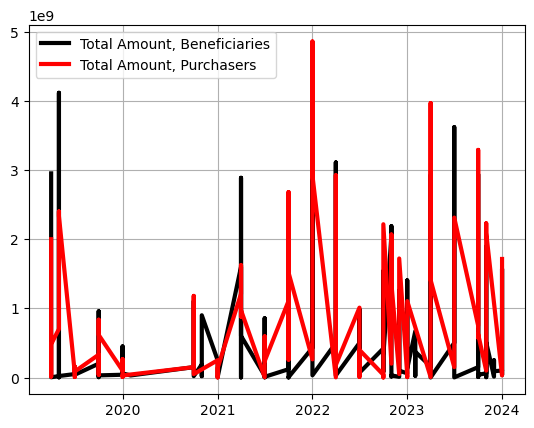

In [14]:
# Imports and basic data analysis
import pandas as pd, numpy as np, matplotlib.pyplot as plt 
beneficiaries,purchasers = pd.read_csv('beneficiaries.csv',usecols=['date_of_encashment','political_party','denomination']),pd.read_csv('purchasers.csv',usecols=['date_of_purchase','purchaser_name','denomination'])

# Discrepancy Analysis in Totals by month
tot_b = beneficiaries.groupby('date_of_encashment')['denomination'].sum().reset_index().rename(columns={'date_of_encashment':'date'})
tot_p = purchasers.groupby('date_of_purchase')['denomination'].sum().reset_index().rename(columns={'date_of_purchase':'date'})
tot_b['date'] = tot_b['date'].str[:-3]
tot_p['date'] = tot_p['date'].str[:-3]
tot_b['date'] = pd.to_datetime(tot_b['date'],format="%Y-%m",yearfirst=True) 
tot_p['date'] = pd.to_datetime(tot_p['date'],format="%Y-%m",yearfirst=True)
tot_p = tot_p.groupby('date')['denomination'].sum().reset_index()
tot_b = tot_b.groupby('date')['denomination'].sum().reset_index()
plt.plot(tot_b['date'],tot_b['denomination'],label='Total Amount, Beneficiaries',linewidth=3,color='black')
plt.plot(tot_p['date'],tot_p['denomination'],label='Total Amount, Purchasers',linewidth=3,color='red')
plt.grid()
plt.legend() 
plt.show()

In [15]:
tot_p

,date,denomination
0,2019-04-01,1999800000
1,2019-04-01,661300000
2,2019-04-01,1532501000
3,2019-04-01,14000000
4,2019-04-01,1976670000
...,...,...
141,2024-01-01,215000000
142,2024-01-01,284000000
143,2024-01-01,1355502000
144,2024-01-01,1580001000
